# Logistic Regression exercise

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [ ]:
# Read the data for you
data = pd.read_csv('./datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
from bitstring import xrange

# transform the labels to binary
for i in xrange(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print (X_train.shape)
print (X_test.shape)

(28000, 785)
(14000, 785)


In [5]:
# X_train_feats = None # choose and extract features
# X_test_feats = None # choose and extract features
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)

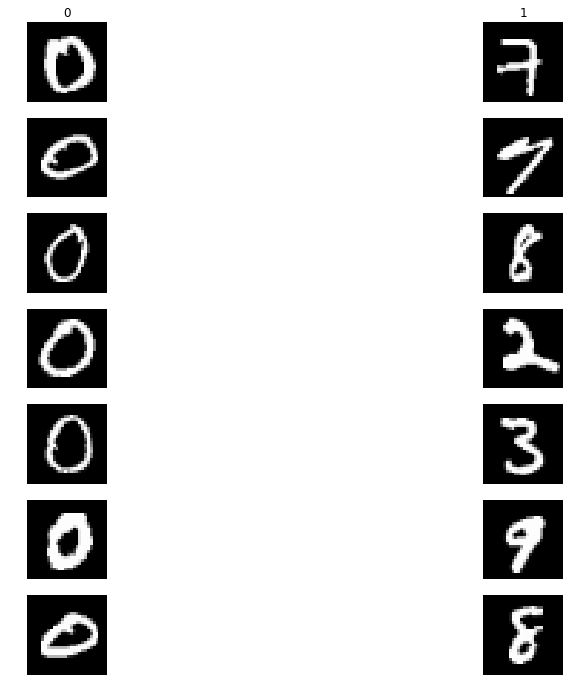

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [12]:
from classifiers.logistic_regression import LogisticRegression

# Start training. 

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.695234
iteration 100 / 500: loss 0.166836
iteration 200 / 500: loss 0.187987
iteration 300 / 500: loss 0.118369
iteration 400 / 500: loss 0.097800


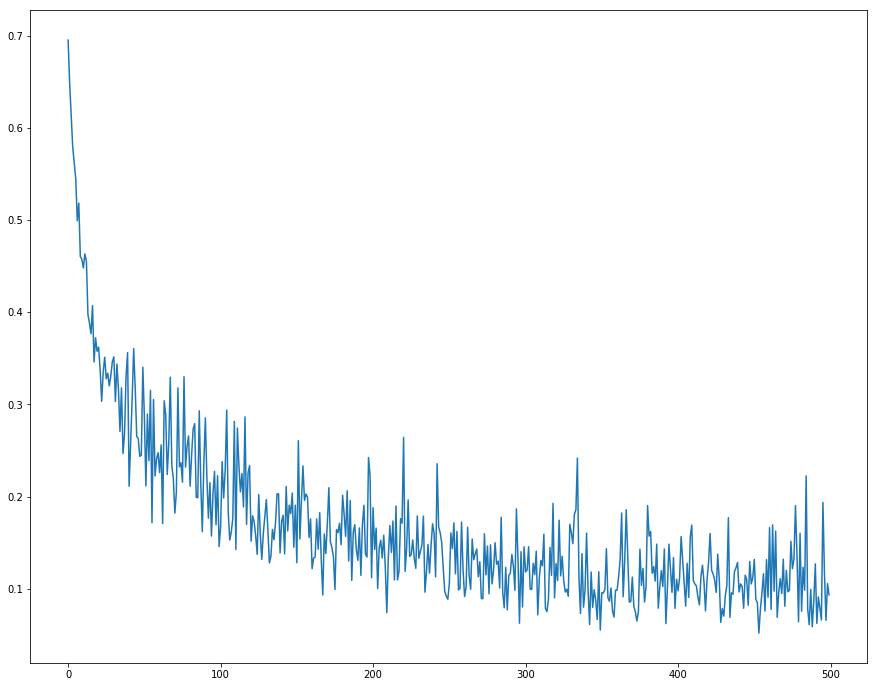

In [13]:
# print loss_history
plt.plot(loss_history)

In [14]:
y_test_pred = classifier.predict(X_test_feats)
print("The accuracy socre is ", np.mean(y_test == y_test_pred))

The accuracy socre is  0.976714285714


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [15]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

TP = 0.0
FP = 0.0
FN = 0.0
TN = 0.0

#calculate TP
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 0:
        TP += 1.0
# print TP

#calculate FP
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 1:
        FP += 1.0
# print FP

#calculate FN
for it in range(785):
    if y_test_pred[it] == 1 and y_test[it] == 0:
        FN += 1.0
# print FN

#calculate TN
for it in range(785):
    if y_test_pred[it] == 1 and y_test[it] == 1:
        TN += 1.0
# print TN
    
precision = TP /(TP + FP)

recall = TP / (TP + FN)
    
print(precision)
print(recall)
print('F1:', precision*recall*2/(precision+recall))

1.0
0.793103448276
F1: 0.884615384615


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [16]:
# Read the data for you
data = pd.read_csv('./datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# print y_train
# print y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(28000, 785)
(28000,)
(14000, 785)


In [17]:
# X_train_feats = None # choose and extract features
# X_test_feats = None # choose and extract features
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)

In [18]:
# Start training. 

classifier = LogisticRegression()
classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

it =  0
iteration 0 / 500: loss 0.700183
iteration 100 / 500: loss 0.205990
iteration 200 / 500: loss 0.155711
iteration 300 / 500: loss 0.098892
iteration 400 / 500: loss 0.187707
it =  1
iteration 0 / 500: loss 0.698656
iteration 100 / 500: loss 0.191177
iteration 200 / 500: loss 0.149994
iteration 300 / 500: loss 0.087672
iteration 400 / 500: loss 0.144179
it =  2
iteration 0 / 500: loss 0.696690
iteration 100 / 500: loss 0.319698
iteration 200 / 500: loss 0.210433
iteration 300 / 500: loss 0.158022
iteration 400 / 500: loss 0.182074
it =  3
iteration 0 / 500: loss 0.693658
iteration 100 / 500: loss 0.229848
iteration 200 / 500: loss 0.232187
iteration 300 / 500: loss 0.216187
iteration 400 / 500: loss 0.189299
it =  4
iteration 0 / 500: loss 0.683720
iteration 100 / 500: loss 0.366927
iteration 200 / 500: loss 0.167241
iteration 300 / 500: loss 0.153792
iteration 400 / 500: loss 0.193035
it =  5
iteration 0 / 500: loss 0.694763
iteration 100 / 500: loss 0.379306
iteration 200 / 500

In [19]:
y_test_pred = classifier.one_vs_all_predict(X_test_feats)
print( "The accruacy socre is ", np.mean(y_test == y_test_pred))

The accruacy socre is  0.833
